In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np


In [2]:

qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()

qc.h(0)
qc.measure(0,0)


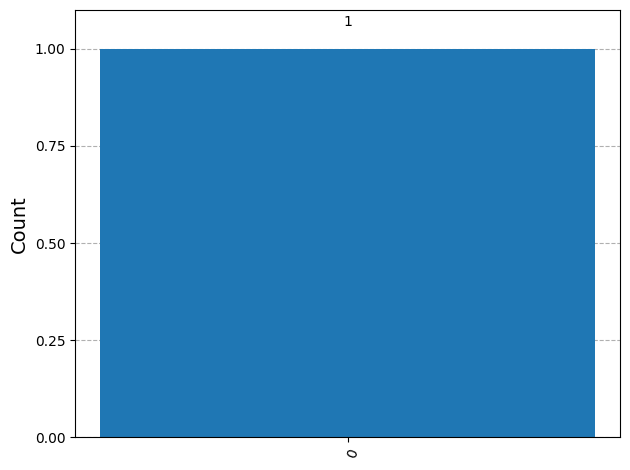

In [3]:
qc.draw()
shots = 1 #128
result = AerSimulator().run(qc, shots=shots, memory=True).result()
answer=result.get_counts()
plot_histogram(answer)



In [4]:
qc = QuantumCircuit(1,1)

qc.h(0)

qc.measure(0, 0)
qc.barrier()

qc.h(0)
qc.measure(0,0)


┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

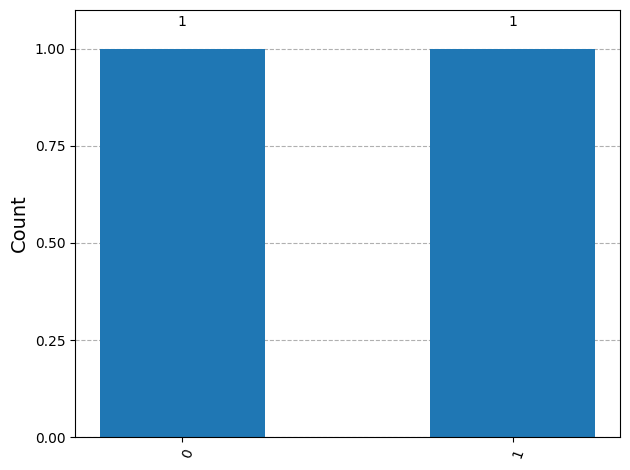

In [5]:
display(qc.draw())
shots = 2 # 128
result = AerSimulator().run(qc, shots=shots, memory=True).result()
answer=result.get_counts()
plot_histogram(answer)

In [6]:
np.random.seed(seed=0)
n = 100

alice_bits = randint(2, size=n)
print(alice_bits)


[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [7]:
alice_bases = randint(2, size=n)
print(alice_bases)


[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [8]:
def encode_message(bits, bases):
    message = [ ]
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else:
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message


In [9]:
np.random.seed(seed=0)
n = 100

alice_bits = randint(2, size=n)

alice_bases = randint(2, size=n)



message = encode_message(alice_bits, alice_bases)


print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])


print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])


bit = 0
basis = 1
bit = 1
basis = 0


In [10]:
bob_bases = randint(2, size=n)
print(bob_bases)


[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [11]:
def measure_message(message, bases):

    measurements = []

    for q in range(n):
        if bases[q] == 0:
             message[q].measure(0,0)
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0,0)

        result = AerSimulator().run(qc, shots=shots, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [12]:
bob_bases = randint(2, size=n)
print(bob_bases)






bob_results = measure_message(message, bob_bases)
message[0].draw()


message[6].draw()

print(bob_results)


[1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1]
[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]


In [13]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = [ ]
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            good_bits.append(bits[q])
    return good_bits

In [14]:
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1)]
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]


In [15]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample

In [16]:
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

bob_sample == alice_sample



print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))


  bob_sample = [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
alice_sample = [np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1)]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0)]
key length = 32
